# Checking the difference in the prediction, number of times one experiment over and under predicts

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import gluon

In [2]:
from src.RQ1_forecast import *

In [3]:
num_samples = 100

In [4]:
data_address1 = '/home/dev/deepts/experiments/deepstate/electricity/1B'

# metric section

In [5]:
# loop through all the runs in the results folder and read the metric dataframe
metrics_list1 = read_csv_result('metrics.csv', data_address1)

101it [00:00, 31885.04it/s]
100%|##########| 100/100 [00:00<00:00, 118.62it/s]


In [6]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,426.866333,469.668518,235.0,9.791667,8.031874,2.436483,4.137137,1.058428,NaN,10.449720,81.012937,0.041667,469.668503,0.916667,217.061987,1.000000
1,1,1.0,45.860031,120.203552,2499.0,104.125000,9.577165,0.522961,0.046577,0.048190,NaN,3.607383,66.795306,0.000000,120.203552,0.250000,48.713925,0.791667
2,2,2.0,0.210645,9.390136,190.0,7.916667,8.673073,0.045112,0.050201,0.050460,NaN,0.349170,7.720058,0.000000,9.390136,0.500000,6.816158,1.000000
3,3,3.0,1457.894531,649.608521,10468.0,436.166667,48.398763,0.559250,0.056887,0.059469,NaN,5.489459,355.512622,0.000000,649.608551,0.125000,332.654932,0.875000
4,4,4.0,293.102295,354.878113,4087.0,170.291667,25.383302,0.582532,0.096263,0.091204,NaN,3.436857,113.425519,0.291667,354.878113,0.708333,164.137033,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,2242,316.0,1758.893555,790.214722,6671.0,277.958333,30.914619,1.065050,0.152333,0.146140,NaN,9.016464,336.620261,0.041667,790.214752,0.458333,330.286012,0.750000
2243,2243,317.0,544.589233,414.816193,1058.0,44.083333,31.192686,0.554105,0.399765,0.349835,NaN,3.638047,184.010658,0.166667,414.816193,0.583333,154.847239,0.916667
2244,2244,318.0,172436.322917,7853.445801,50192.0,2091.333333,267.793565,1.221937,0.174804,0.159352,NaN,20.652754,6358.992529,0.291667,7853.446045,0.416667,2536.704028,0.916667
2245,2245,319.0,8246.822266,1674.073975,10581.0,440.875000,169.860660,0.410649,0.276608,0.215514,NaN,1.909859,699.356342,0.041667,1674.073975,0.416667,854.370129,1.000000


In [7]:
def sort_metric_df(my_metrics_df):
    my_metrics_df.sort_values(by=['item_id', 'Unnamed: 0'], inplace=True)
    my_metrics_df.reset_index(drop=True, inplace=True)
    return my_metrics_df

In [8]:
def sort_metric_list(my_metric_list):
    for my_metric_df in my_metric_list:
        my_metric_df = sort_metric_df(my_metric_df)

In [9]:
sort_metric_list(metrics_list1)


In [10]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,426.866333,469.668518,235.0,9.791667,8.031874,2.436483,4.137137,1.058428,NaN,10.449720,81.012937,0.041667,469.668503,0.916667,217.061987,1.000000
1,321,0.0,163.650197,257.480377,264.0,11.000000,8.026991,1.336534,2.859490,0.815176,NaN,6.886401,89.392786,0.000000,257.480380,0.875000,173.241381,0.958333
2,642,0.0,170.562887,262.342590,284.0,11.833333,8.025109,1.362093,1.895919,0.727328,NaN,6.925060,86.945643,0.000000,262.342593,0.958333,179.811315,1.000000
3,963,0.0,107.429728,223.939789,189.0,7.875000,8.024132,1.162845,2.687130,0.892732,NaN,7.092622,90.681048,0.000000,223.939794,0.916667,182.497218,1.000000
4,1284,0.0,165.549011,269.083191,166.0,6.916667,8.019890,1.397999,2.237513,1.528171,NaN,6.975426,169.317282,0.000000,269.083217,0.291667,99.205019,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,962,320.0,14816.535156,2413.727783,74254.0,3093.916667,287.494114,0.349823,0.033312,0.032910,NaN,2.635079,1368.314648,0.083333,2413.727783,0.625000,1436.538135,1.000000
2243,1283,320.0,99538.291667,6240.198730,78719.0,3279.958333,287.257349,0.905141,0.075565,0.079600,NaN,9.445582,2547.829736,0.000000,6240.198730,0.041667,2664.618945,0.583333
2244,1604,320.0,65924.875000,5122.668945,74298.0,3095.750000,287.146950,0.743329,0.067261,0.068907,NaN,6.136184,2760.017163,0.166667,5122.669189,0.208333,1464.758496,0.875000
2245,1925,320.0,56673.296875,4758.456055,68217.0,2842.375000,287.030085,0.690760,0.072926,0.076447,NaN,7.586474,2235.170410,0.041667,4758.456177,0.208333,2350.396924,0.666667


# Forecast section

In [11]:
# read the forecast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1, n_files=100)
# forcast_list2 = read_csv_result('forecasts.csv', data_address2, n_files=100)

101it [00:00, 37179.63it/s]
100%|###########| 100/100 [01:07<00:00,  1.48it/s]


In [12]:
len(forcast_list1)

100

In [13]:
forcast_list1[0]

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
0,1,0,2014-05-26 20:00:00,9.0,41.540090,-40.385048,30.691260,9.006823,31.792550,22.003620,...,51.123604,48.178288,-4.111729,3.957540,32.716415,23.354840,5.527109,35.426125,-20.549896,21.345095
1,1,0,2014-05-26 21:00:00,10.0,36.602287,-17.144062,-4.044796,-55.093716,21.574799,21.728363,...,39.817226,20.233463,2.263813,16.094915,-19.639317,23.180315,72.349740,54.937347,43.384030,23.533450
2,1,0,2014-05-26 22:00:00,22.0,0.264456,23.827255,-5.304296,11.981367,42.672955,38.439945,...,25.028393,23.370377,12.794313,16.900743,16.410484,35.116300,18.685950,24.460917,12.306867,20.682020
3,1,0,2014-05-26 23:00:00,20.0,-9.424163,30.325008,4.385783,4.991257,18.864580,22.075394,...,-6.201814,0.474540,11.044750,-21.480782,22.649805,39.364660,20.717718,26.438885,-2.644798,-8.561808
4,1,0,2014-05-27 00:00:00,13.0,38.032238,27.026682,17.557960,3.056732,30.437689,54.201576,...,-7.654144,68.892715,18.271627,40.471370,41.855312,23.774435,-1.063927,56.654640,13.903592,10.233876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53923,1,2246,2014-06-02 15:00:00,4209.0,2974.383300,3478.546600,2846.992000,3045.078900,3219.726300,3575.544200,...,3118.435500,2926.639000,3380.798800,3149.546900,2636.788800,3046.457000,2881.152800,3709.780800,3654.946000,3035.252200
53924,1,2246,2014-06-02 16:00:00,4120.0,3371.373500,3555.352300,2751.528800,3127.619100,3364.734000,3639.869400,...,3226.199500,2824.695600,3491.142000,3205.537800,2949.178700,3213.776000,2981.021000,3796.166700,3906.156500,3008.152000
53925,1,2246,2014-06-02 17:00:00,3951.0,3491.506600,3461.182100,2749.560500,3053.869400,3616.911100,3814.522500,...,3112.096000,2884.675300,3418.996000,3420.375700,2958.117200,3058.469700,3074.634800,4027.404800,3714.413800,3316.903000
53926,1,2246,2014-06-02 18:00:00,3907.0,3249.894000,3339.242000,2675.746600,2845.294000,3120.593300,3738.240200,...,3091.182900,2806.275600,3396.957800,3300.949200,2841.467000,3124.424800,3089.995800,4000.955300,3994.829300,3231.714800


In [14]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1, num_time_series=321)
# sorted_forcast_list2 = get_sorted_csv(forcast_list2)

In [15]:
sorted_forcast_list1[0].head(169)

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2014-05-26 20:00:00,9.0,41.540090,-40.385048,30.691260,9.006823,31.792550,22.003620,...,32.716415,23.354840,5.527109,35.426125,-20.549896,21.345095,0,17.104495,23.893369,0.188304
1,1,0,2014-05-26 21:00:00,10.0,36.602287,-17.144062,-4.044796,-55.093716,21.574799,21.728363,...,-19.639317,23.180315,72.349740,54.937347,43.384030,23.533450,0,16.811973,22.406503,0.169954
2,1,0,2014-05-26 22:00:00,22.0,0.264456,23.827255,-5.304296,11.981367,42.672955,38.439945,...,16.410484,35.116300,18.685950,24.460917,12.306867,20.682020,0,12.932603,21.475618,0.235253
3,1,0,2014-05-26 23:00:00,20.0,-9.424163,30.325008,4.385783,4.991257,18.864580,22.075394,...,22.649805,39.364660,20.717718,26.438885,-2.644798,-8.561808,0,12.399058,23.600383,0.185365
4,1,0,2014-05-27 00:00:00,13.0,38.032238,27.026682,17.557960,3.056732,30.437689,54.201576,...,41.855312,23.774435,-1.063927,56.654640,13.903592,10.233876,0,30.148188,20.617838,0.200421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1,1926,2014-06-02 16:00:00,6.0,22.661203,7.488221,-6.283706,-2.906483,-35.478110,3.492714,...,29.848553,-25.212446,-31.845120,-11.157830,30.710447,-57.603474,0,2.169761,21.149572,0.174288
165,1,1926,2014-06-02 17:00:00,10.0,45.110020,-42.977730,-4.651529,6.606239,50.303530,-21.813460,...,9.754844,-9.898271,-26.701908,13.273215,45.561558,-19.295780,0,0.230879,24.038202,0.221668
166,1,1926,2014-06-02 18:00:00,9.0,10.772315,-48.292260,4.204649,-29.480750,-7.580429,6.604164,...,-30.395443,-4.805956,-6.448922,-9.960540,1.710944,4.423451,0,4.198044,22.739503,0.192138
167,1,1926,2014-06-02 19:00:00,9.0,-32.583490,-0.520304,28.683580,14.427992,-9.857394,1.075766,...,25.244272,41.529465,18.657974,0.002930,-9.133451,-50.312325,0,4.552122,24.740621,0.203990


In [16]:
target_forcast_series = get_forcast_target(forcast_list1)

In [17]:
# this dataframe is just one time series
ts_number = 0
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)

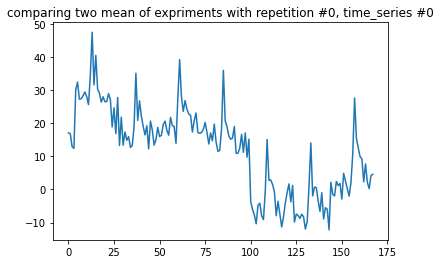

In [18]:
# plot mean of only one time series
rep_no = 0
plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no]['mean'].plot()
# ts_list2[rep_no]['mean'].plot()

## We want to compare the number of time points on experiment underpredict. 
Question is are experiments with worst MAPE, underpredict most of the time?

In [19]:
# question: is the worse one always underpredict?
# we need to use compare means, but I need to change the function
# experiment A
expA_worst_compare = (sorted_forcast_list1[34]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_best_compare = (sorted_forcast_list1[93]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_highest_compare = (sorted_forcast_list1[4]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_lowest_compare = (sorted_forcast_list1[96]['mean'] < sorted_forcast_list1[0]['target']).value_counts()

# # experiment B
# expB_worst_compare = (sorted_forcast_list2[63]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_best_compare = (sorted_forcast_list2[68]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_highest_compare = (sorted_forcast_list2[8]['mean'] < sorted_forcast_list2[0]['target']).value_counts()

In [20]:
# outputs the proportion of true experiences over all the experiences
def compare_two_series(seriesTrue, seriesFalse):
    return seriesTrue/(seriesTrue + seriesFalse)

underpred_A_best = compare_two_series(expA_best_compare[True], expA_best_compare[False])
underpred_A_worst = compare_two_series(expA_worst_compare[True], expA_worst_compare[False])
underpred_A_highest = compare_two_series(expA_highest_compare[True], expA_highest_compare[False])
underpred_A_lowest = compare_two_series(expA_lowest_compare[True], expA_lowest_compare[False])


print(f'percentage of underprediction of worst repetition for experiment A = {underpred_A_worst}')
print(f'percentage of underprediction of best repetition for experiment A = {underpred_A_best}')
print(f'percentage of underprediction of highest repetition for experiment A = {underpred_A_highest}')
print(f'percentage of underprediction of lowest repetition for experiment A = {underpred_A_lowest}')




percentage of underprediction of worst repetition for experiment A = 0.5387739207832666
percentage of underprediction of best repetition for experiment A = 0.5134253078178311
percentage of underprediction of highest repetition for experiment A = 0.5242731048805815
percentage of underprediction of lowest repetition for experiment A = 0.4929906542056075


In [21]:
# find the one with the highest prediction
get_highest_prediction_id(sorted_forcast_list1, high_flag=False), get_highest_prediction_id(sorted_forcast_list1, high_flag=True)

(28, 11)

In [22]:
# find max difference between each experiments with itself and also combined
# combined_forecast_list = sorted_forcast_list1 + sorted_forcast_list2
# combined_max_tuple, _ = get_max_difference_pair(combined_forecast_list)
expA_max_tuple, _ = get_max_difference_pair(sorted_forcast_list1)
# expB_max_tuple, _ = get_max_difference_pair(sorted_forcast_list2)

In [23]:
print(f'the most different tuples of experiment A is: {expA_max_tuple}')
# print(f'the most different tuples of experiment B is: {expB_max_tuple}')
# print(f'the most different tuples of Combined experiments is: {combined_max_tuple}')

the most different tuples of experiment A is: (11, 74)


(10500.0, 10650.0)

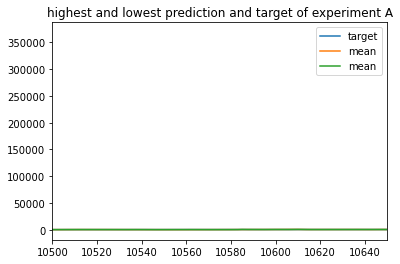

In [24]:
plt.title('highest and lowest prediction and target of experiment A')
sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[36]['mean'].plot(legend=True)
sorted_forcast_list1[42]['mean'].plot(legend=True)
plt.xlim([10500,10650])
# plt.ylim([0.04,0.24])

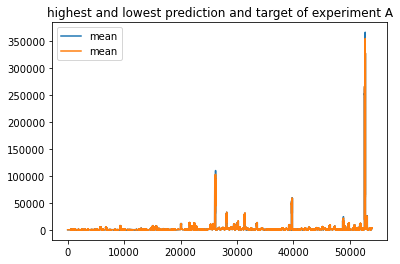

In [25]:
plt.title('highest and lowest prediction and target of experiment A')
# sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[4]['mean'].plot(legend=True)
sorted_forcast_list1[93]['mean'].plot(legend=True)
# plt.xlim([10500,10650])
# plt.ylim([0.04,0.24])

## take the average of experiment A and B and plot them
the reults show that after running 100 times, the average of results are converging.

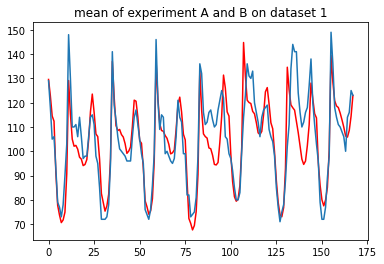

In [26]:
ts_no = 1

# calculate the mean of all means for computer A
ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)


means_A = np.zeros((len(ts_list1) , ts_list1[0]['mean'].shape[0]))
# means_B = np.zeros((len(ts_list2) , ts_list2[0]['mean'].shape[0]))


for idx, ts_df1 in enumerate(ts_list1):
    means_A[idx] = ts_df1['mean'].to_numpy()
# for idx, ts_df2 in enumerate(ts_list2):
#     means_B[idx] = ts_df2['mean'].to_numpy()

mean_means_A = means_A.mean(axis=0)
# mean_means_B = means_B.mean(axis=0)

plt.title(f'mean of experiment A and B on dataset {ts_no}')
plt.plot(mean_means_A, color='r')
# plt.plot(mean_means_B, color='red')
plt.plot(ts_list1[0]['target'].to_numpy())
# mean1 = ts_list1[0]['mean'].to_numpy()
# mean1.shape

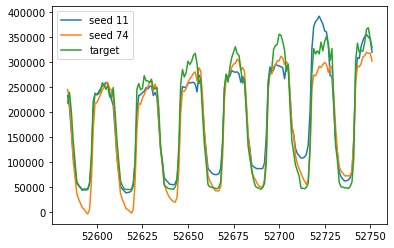

In [30]:
# this dataframe is just one time series
ts_number = 313
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)

# plot mean of only one time series
# plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')



rep_no = 11
ts_list1[rep_no]['mean'].plot(label='seed 11')
# ts_list2[rep_no]['mean'].plot()

rep_no = 74
ts_list1[rep_no]['mean'].plot(label='seed 74')

ts_list1[rep_no]['target'].plot(label='target')

plt.legend()
